## 数据集加载工具
`sklearn.datasets`子包主要用于数据集加载和生成。
### Toy datasets
scikit-learn内置了几个标准数据集，可以使用相应的函数进行加载。
1. Boston house prices datasets
2. Iris plants datasets
```python
    函数：sklearn.datasets.load_iris(*, return_X_y=False, as_frame=False)
    功能：加载和返回iris数据集（多分类数据集）
    参数：
        return_X_y(bool,default=False)：如果为True，返回(data,target)而不是bunch对象  
        as_frame(bool,default=False)：如果为True，数据为pandas数据框架
    返回：
        bunch对象：类似dict的数据结构，主要有下列属性
            data：数据矩阵(150,4)
            target：分类目标(150,)
            feature_names：数据集列名称(list)
            target_names：目标类名称(list)
            frame：
            DESCR：数据集描述
            filename：数据集的路径
        (data,target)元组
```
3. Diabetes datasets
4. Optical recognition of handwritten digits datasets
5. Linnerrud datasets
6. Wine recognition datasets
7. Breast cancer wisconsin (diagnostic) datasets
### Real world datasets
scikit-learn提供了加载大型数据集的工具
1. The Olivetti faces dataset
2. The 20 newsgroups text dataset
3. The Labeled Faces in the Wild face recognition dataset
4. Forest covertypes dataset
5. RCV1 dataset
6. Kddcup 99 datase
7. California Housing dataset
### Generated datasets
scikit-learn提供了随机样本生成器，可以通过控制数据集规模和复杂度构建人造数据集。
1. Generators for classification and clustering
2. Generators for regression
3. Generators for manifold learning
4. Generators for decomposition
### Loading other datasets
1. Sample images
2. Datasets in svmlight / libsvm format
3. Downloading datasets from the openml.org repository
4. Loading from external datasets
### Bunch object
数据集加载成功后返回的数据对象，是字典类型的扩展。


## Perceptron(感知机)

Text(0.5, 1.0, 'Perceptron Classifier')

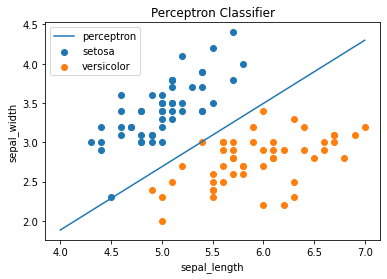

In [1]:
# 用感知机对iris数据集进行分类
%matplotlib inline
import sklearn.datasets as skd
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
import numpy as np

# 加载数据集
datesets=skd.load_iris()
data=datesets['data']

# 将数据集的前两个属性作为输入进行感知机分类
plt.scatter(data[:50,0],data[:50,1],label='setosa')
plt.scatter(data[50:100,0],data[50:100,1],label='versicolor')

X=data[:100,0:2]
y=np.array([-1]*50+[1]*50)
percep=skl.Perceptron(tol=None)
percep.fit(X,y)

# 拟合得到的多项式和截距
w=percep.coef_
b=percep.intercept_

x=np.arange(4,8)
y_=-(w[0,0]*x+b)/w[0,1]

plt.plot(x,y_,label='perceptron')
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Perceptron Classifier')


## KNN
`sklearn.neighbors`模块实现了k近邻算法，无监督k近邻是流形学习（manifold learning）和谱聚类（spectral clustering）的基础，监督k近邻主要用于数据分类和回归.
### 无监督k近邻
无监督k近邻学习实现了3种不同的算法：**BallTree、KDTree和Brute-force**，通过关键字`algorithm=['auto','ball_tree','kd_tree','brute']`选择相应的算法。
1. sklearn.neighbors.NearestNeighbors  
   无监督学习器，实现近邻搜索。
   ```
   参数：
      - n_neighbors：要查到的近邻数量
      - radius：要查找的近邻半径
      - algorithm：找算法（‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’）
      - leaf_size：叶节点的大小（叶节点包含的实例数）
      - metric：距离的度量，默认使用Lp距离
      - p：默认为2，即欧几里得距离
      - metric_params：dict类型，与metric有关
      - n_jobs：并行执行近邻搜索的数量
   属性：
      - effective_metric_
      - effective_metric_params_
      - n_features_in_
      - feature_names_in_
      - n_samples_fit_
   方法：
      - fit()：根据算法类型对训练数据拟合近邻估计器（nearest neighbors estimator）
      - get_params()：获取估计器的参数
      - kneighbors()：查找k个近邻点，返回每个点的距离和索引
      - kneighbors_graph()：
      - radius_neighbors()：查找半径r的近邻点
      - radius_neighbors_graph()：
      - set_params()
   ```
2. sklearn.neighbors.KDTree  
   快速生成KD树.
   ```
   参数：
      - X：生成kd树的数据集
      - leaf_size：叶子节点的大小（包含的实例数），在叶子结点内使用蛮算
      - metric
   属性：
      - data：训练集
   方法：
      - get_arrays()：数据和节点数组
      - get_n_calls()：距离计算调用的次数
      - get_tree_stats()：树的参数
      - query()
      - query_radius()
      - two_point_correlation()
   ```
3. sklearn.neighbors.BallTree
4. 算法的选择
   - 样本数N和维数D（$N<30$选择蛮算）
   - 数据结构
   - k的值
   - 查询点的数量
### k近邻分类
k近邻分类学习包含了2种不同的k近邻分类器：**KNeighborsClassifier和RadiusNeighborsClassifier**，前者查找实例点的k个最近邻点，后者在实例点为圆心、半径为r的圆中查找近邻点；在k近邻分类中可以通过参数`weights=['uniform','distance']`控制每个近邻点的权重.
1. sklearn.neighbors.KNeighborsClassifier
   ```
   参数：
      - n_neighbors
      - weights
      - algorithm
      - leaf_size
      - p
      - metric
      - metric_params
      - n_jobs
   属性：
      - classes_
      - effective_metric_
      - effective_metric_params_
      - n_features_in_
      - feature_names_in_
      - n_samples_fit_
      - outputs_2d_
   方法：
      - fit()
      - get_params()
      - kneighbors()
      - kneighbors_graph()
      - predict()
      - predict_proba()
      - score()
      - set_params()
   ```
2. sklearn.neighbors.RadiusNeighborsClassifier
   ```
   参数：
      - radius
      - weights
      - algorithm
      - leaf_size
      - p
      - metric
      - outlier_label:在半径范围内没有近邻时的选择
      - metric_params
      - n_jobs
   属性：
      - classes_
      - effective_metric_
      - effective_metric_params_
      - n_features_in_
      - feature_names_in_
      - n_samples_fit_
      - outlier_label_
      - outputs_2d_
   方法：
      - fit()
      - get_params()
      - radius_neighbors()
      - radius_neighbors_graph()
      - predict()
      - predict_proba()
      - score()
      - set_params()
   ```
### k近邻回归
k近邻回归学习实现了2种不同的k近邻回归器：**KNeighborsRegressor和RadiusNeighborsRegressor**
1. sklearn.neighbors.KNeighborsRegressor 
2. sklearn.neighbors.RadiusNeighborsRegressor
### 近质心分类器(Nearest Centroid Classifier)
### (Nearest Neighbors Transformer)
### 邻域成分分析(Neighborhood Components Analysis)

Text(0, 0.5, 'sepal width (cm)')

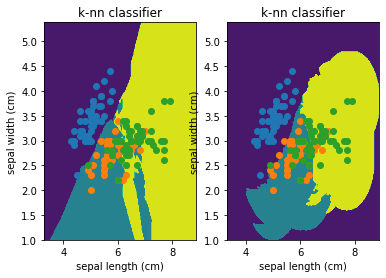

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as skd
import sklearn.neighbors as skn

n_neighbors=10
h=0.02
# 加载iris数据集
iris=skd.load_iris()
X=iris.data[:,:2]
y=iris.target

# 创建k近邻分类器并学习数据集
clf=skn.KNeighborsClassifier(n_neighbors=n_neighbors,algorithm='kd_tree')
clr=skn.RadiusNeighborsClassifier(radius=1,algorithm='kd_tree',outlier_label='most_frequent')
clf.fit(X,y)
clr.fit(X,y)

# 对新的数据进行预测并划分三个分类区域
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1

# meshgird函数使用数组生成网格
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
Z1=clf.predict(np.column_stack((xx.ravel(),yy.ravel())))
Z2=clr.predict(np.column_stack((xx.ravel(),yy.ravel())))

# 绘制等高线
plt.subplot(1,2,1)
plt.contourf(xx,yy,Z1.reshape(xx.shape))
plt.scatter(X[:50,0],X[:50,1])
plt.scatter(X[50:100,0],X[50:100,1])
plt.scatter(X[100:,0],X[100:,1])
plt.title('k-nn classifier')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.subplot(1,2,2)
plt.contourf(xx,yy,Z2.reshape(xx.shape))
plt.scatter(X[:50,0],X[:50,1])
plt.scatter(X[50:100,0],X[50:100,1])
plt.scatter(X[100:,0],X[100:,1])
plt.title('k-nn classifier')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

## 朴素贝叶斯
`sklearn.naive_bayes`模块实现了朴素贝叶斯算法——一种基于贝叶斯特征独立假设的有监督学习方法.
### 高斯朴素贝叶斯(Gaussian Naive Bayes)
`GaussianNB`类实现了高斯朴素贝叶斯分类算法，假设所有特征相互独立且服从高斯分布，参数$\sigma_y$和$\mu_y$使用最大似然方法估计：
$$P(x_i|y)=\frac{1}{\sqrt{2\pi\sigma_{y}^2}}exp(-\frac{(x_i-\mu_y)^2}{2\sigma_{y}^2})$$
```
    参数：
        - priors：类的先验概率，如果指定该值，学习中不在利用数据进行调整
        - var_smoothing：平滑变量
    属性：
        - var_：特征的方差
        - theta_：特征的均值
    函数：
        - fit(X,y)
        - get_params()
        - partial_fit()：对一批样本进行增量拟合（更新模型参数）
        - predict()
        - predict_log_proba()
        - predict_proba()
        - score()
        - set_params()
```
### 多项式朴素贝叶斯( Multinomial Naive Bayes)
`MultinomialNB`类实现了多项分布的朴素贝叶斯算法，是文本分类的典型朴素贝叶斯算法。
### 补充朴素贝叶斯(Complement Naive Bayes)
`ComplementNB`类实现了补充朴素贝叶斯（CNB）算法，是标准多项式朴素贝叶斯算法的改进，适用于不平衡数据集。
### 伯努利朴素贝叶斯(Bernoulli Naive Bayes)
`BernoulliNB`类实现了多重伯努利分布数据的朴素贝叶斯训练和分类算法，即输入具有多个特征但每个特征相互独立且服从二项分布（伯努利分布），此时条件概率：
$$P(x_i|y)=P(i|y)x_i+(1-P(i|y))(1-x_i)$$
### 分类朴素贝叶斯(Categorical Naive Bayes)
分类朴素贝叶斯分类器适用于服从分类分布的离散特征。
> **分类分布**  
> 是伯努利分布的泛化，每次观察结果可能出现k个结果：$Cat_x(\lambda)=P(x=i)=\lambda_i$，满足$\sum_{i=1}^k\lambda_i=1$
```
    参数：
        - alpha：平滑参数
        - fit_prior
        - class_prior
        - min_categories：每个特征的最小分类数
```
### 朴素贝叶斯模型拟合
朴素贝叶斯模型可以被用来处理大规模分类数据，完整的训练集无法全部加载到内存进行学习，partial_fit()方法可以用递增的方式对大规模数据集进行拟合处理。

In [ ]:
# 此处应该实现一个朴素贝叶斯文本分类

## 决策树(DTs:Decision Trees)
`sklearn.tree`模块实现了基于决策树模型的分类和回归算法，是一种无参的监督学习方法.
- 缺点
  - 过拟合：通过剪枝、设置叶结点样本最小数和树的最大深度避免过拟合
  - 结构不稳定
  - 决策树的预测不平滑、也不连续
  - 启发式算法(heuristic algorithms)构建的决策树不能确保全局最优
  - 决策树表达能力有限
### 分类
`DecisionTreeClassifier`类实现了决策树的多分类算法。
    ```
    参数：
        - criterion：生成决策树的准则，{“gini”, “entropy”}基尼指数和信息增益
        - splitter：分割点的选择策略，{“best”, “random”}
        - max_depth：树的深度
        - min_samples_split：节点要被分割的样本最小数量
    方法：
        - apply()：
    ```
### 回归
`DecisionTreeRegressor`

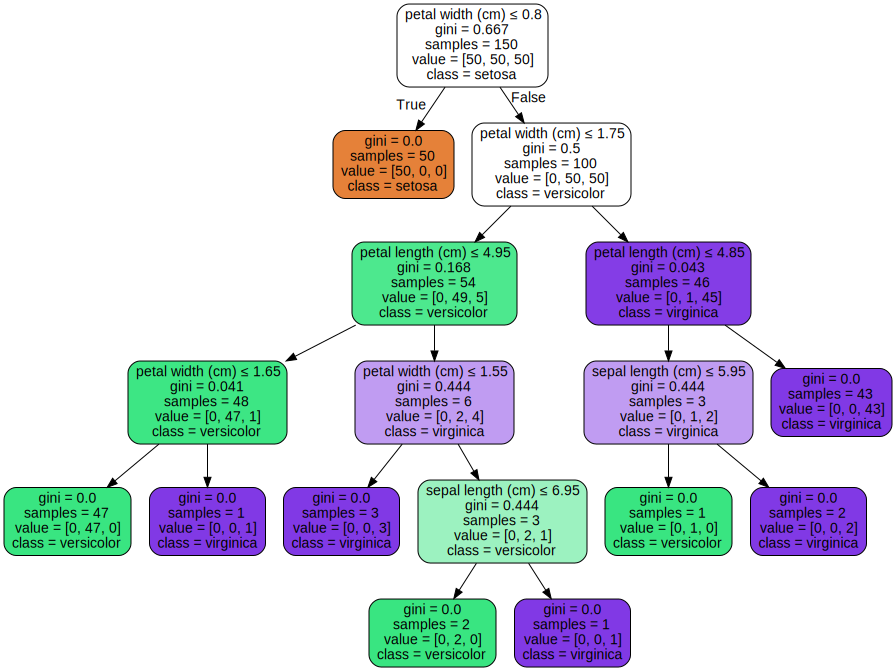

In [1]:
%matplotlib inline
import graphviz
import numpy as np
import matplotlib.pyplot as plt
import sklearn.tree as skt
import sklearn.datasets as skd

iris=skd.load_iris()
X,y=iris.data,iris.target
clf=skt.DecisionTreeClassifier()
clf.fit(X,y)
# 画出决策树
dot_data=skt.export_graphviz(clf,out_file=None,feature_names=iris.feature_names,
class_names=iris.target_names,filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph

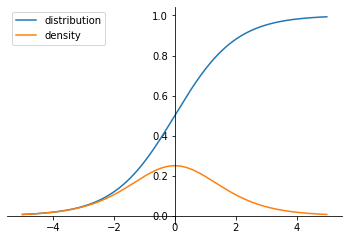

In [3]:
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(-5,5,0.01)
y1=1/(1+np.exp(-x))
y2=(np.exp(-x))/(1+np.exp(-x))**2

plt.plot(x,y1,label='distribution')
plt.plot(x,y2,label='density')

plt.legend()

ax=plt.gca()
ax.spines['top'].set_color('None')
ax.spines['right'].set_color('None')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))